In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

/Users/imayakulothungan/anaconda3/lib/python3.7/site-packages/pandas_datareader-0.9.0.dev0+35.gc60ea8a-py3.7.egg/pandas_datareader/compat/__init__.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
#read in the url and scrape ticker data
data_table = pd.read_html(sp500_url)

In [14]:
tickers = data_table[0].Symbol.tolist()
prices_list = []
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)

prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,162.473648,36.710361,53.335423,112.360001,110.311638,35.941536,103.480003,11.43,169.213242,10.194780,...,81.032707,36.846268,25.158894,55.673347,48.126514,59.794376,86.250000,100.892143,40.478802,52.480232
2017-01-04,162.720047,37.001789,54.087471,115.739998,110.576851,36.647812,104.139999,11.43,170.601822,10.107348,...,83.645470,37.009541,26.108286,55.268082,48.843800,60.011948,87.029999,101.819733,41.060013,52.989464
2017-01-05,162.163406,37.321415,54.497681,114.809998,108.919258,37.216755,105.910004,11.24,170.482819,9.976195,...,84.720230,37.009541,25.998739,54.598904,48.397919,60.210606,84.750000,102.473930,40.394432,52.813190
2017-01-06,162.637924,38.336704,54.514774,115.419998,110.160088,37.187328,108.300003,11.32,168.251114,10.334674,...,85.637459,37.118397,25.597078,55.654499,48.058662,60.938988,85.959999,102.483688,40.656918,52.979675
2017-01-09,161.761902,38.299114,54.873703,117.110001,108.928719,36.981331,108.570000,11.49,168.151932,10.081117,...,85.933945,36.556000,25.451015,55.663929,47.855099,61.109264,85.970001,104.475548,40.216324,52.832783


In [22]:
prices_df.pct_change().head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.001517,0.007939,0.014100,0.030082,0.002404,0.019651,0.006378,0.000000,0.008206,-0.008576,...,0.032243,0.004431,0.037736,-0.007279,0.014904,0.003639,0.009043,0.009194,0.014358,0.009703
2017-01-05,-0.003421,0.008638,0.007584,-0.008035,-0.014990,0.015525,0.016996,-0.016623,-0.000698,-0.012976,...,0.012849,0.000000,-0.004196,-0.012108,-0.009129,0.003310,-0.026198,0.006425,-0.016210,-0.003327
2017-01-06,0.002926,0.027204,0.000314,0.005313,0.011392,-0.000791,0.022566,0.007117,-0.013090,0.035933,...,0.010827,0.002941,-0.015449,0.019334,-0.007010,0.012097,0.014277,0.000095,0.006498,0.003152
2017-01-09,-0.005386,-0.000981,0.006584,0.014642,-0.011178,-0.005539,0.002493,0.015018,-0.000589,-0.024535,...,0.003462,-0.015151,-0.005706,0.000169,-0.004236,0.002794,0.000116,0.019436,-0.010837,-0.002773


In [88]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
#returns = prices_df.pct_change().mean() * 252
#returns = pd.DataFrame(returns)
#returns.columns = ['Returns']
#returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
returns = pd.DataFrame({'Returns': prices_df.pct_change().mean() * 252, 'Volatility':prices_df.pct_change().std() * sqrt(252)})
returns.head()

,Returns,Volatility
MMM,-0.054899,0.246807
ABT,0.210314,0.236110
ABBV,0.124446,0.299875
ABMD,0.167981,0.437841
ACN,0.128471,0.226573


In [89]:
#identify the outlier
print(returns.idxmax())

Returns       TT
Volatility    TT
dtype: object


In [90]:
#drop the relevant stock from our data
returns.drop('TT',inplace=True)

In [91]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
data.shape

(500, 2)

Text(0.5, 1.0, 'Elbow curve')

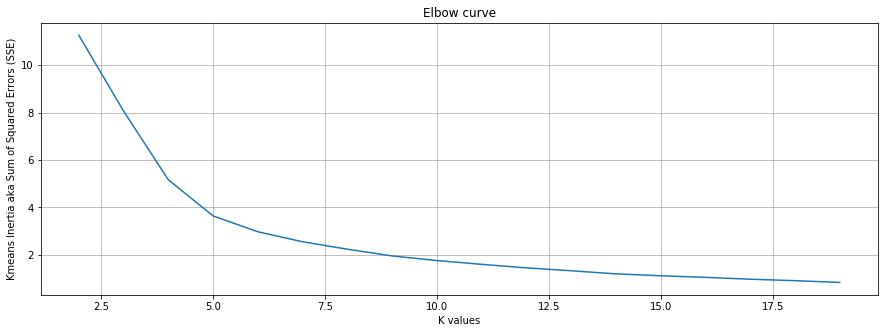

In [92]:
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.xlabel('K values')
plt.ylabel('Kmeans Inertia aka Sum of Squared Errors (SSE)')
plt.grid(True)
plt.title('Elbow curve')

In [93]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

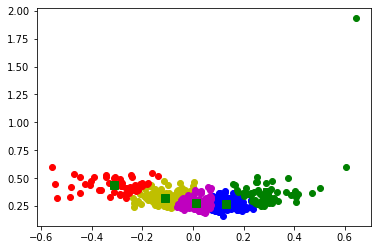

In [95]:
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [86]:
print(returns.idxmax())

Returns       TT
Volatility    TT
dtype: object


In [96]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('MMM', 4)
('ABT', 0)
('ABBV', 0)
('ABMD', 3)
('ACN', 0)
('ATVI', 3)
('ADBE', 3)
('AMD', 3)
('AAP', 1)
('AES', 0)
('AFL', 4)
('A', 0)
('APD', 0)
('AKAM', 0)
('ALK', 2)
('ALB', 1)
('ARE', 0)
('ALXN', 1)
('ALGN', 3)
('ALLE', 0)
('AGN', 4)
('ADS', 2)
('LNT', 0)
('ALL', 4)
('GOOGL', 0)
('GOOG', 0)
('MO', 1)
('AMZN', 3)
('AMCR', 4)
('AEE', 0)
('AAL', 2)
('AEP', 0)
('AXP', 4)
('AIG', 2)
('T', 4)
('AMT', 0)
('AWK', 0)
('AMP', 4)
('ABC', 4)
('AME', 0)
('AMGN', 0)
('APH', 4)
('ADI', 0)
('ANSS', 3)
('ANTM', 0)
('AON', 0)
('AOS', 4)
('APA', 2)
('AIV', 1)
('AAPL', 3)
('AMAT', 3)
('APTV', 4)
('ADM', 4)
('ARNC', 1)
('ANET', 3)
('AJG', 0)
('AIZ', 0)
('ATO', 0)
('ADSK', 3)
('ADP', 0)
('AZO', 4)
('AVB', 4)
('AVY', 0)
('BKR', 2)
('BLL', 0)
('BAC', 4)
('BK', 1)
('BAX', 0)
('BDX', 0)
('BBY', 3)
('BIIB', 4)
('BLK', 4)
('BA', 4)
('BKNG', 4)
('BWA', 1)
('BXP', 1)
('BSX', 0)
('BMY', 4)
('AVGO', 0)
('BR', 0)
('CHRW', 4)
('COG', 1)
('CDNS', 3)
('CPB', 4)
('COF', 1)
('CPRI', 2)
('CAH', 1)
('KMX', 4)
('CCL', 2)
(